<a href="https://colab.research.google.com/github/jayeshmanani/TensorFlow/blob/master/linear_regression_tf_lite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U "tensorflow-gpu==2.0.0b1"

     |████████████████████████████████| 348.9MB 41kB/s 
     |████████████████████████████████| 3.1MB 39.3MB/s 
     |████████████████████████████████| 501kB 56.9MB/s 


In [0]:
%matplotlib inline

import pathlib
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input

from google.colab import files

### Create a basic model of form y = mx + c

In [4]:
# create a basic keras model
x = [-1,0,1,2,3,4]
y = [-3,-1,1,3,5,7]

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(units=1,input_shape = [1])
])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x,y,epochs=200)

Train on 6 samples
Epoch 1/200
6/6 [==============================] - 0s 14ms/sample - loss: 13.6345
Epoch 2/200
6/6 [==============================] - 0s 496us/sample - loss: 10.9595
Epoch 3/200
6/6 [==============================] - 0s 377us/sample - loss: 8.8502
Epoch 4/200
6/6 [==============================] - 0s 299us/sample - loss: 7.1861
Epoch 5/200
6/6 [==============================] - 0s 420us/sample - loss: 5.8722
Epoch 6/200
6/6 [==============================] - 0s 466us/sample - loss: 4.8340
Epoch 7/200
6/6 [==============================] - 0s 334us/sample - loss: 4.0128
Epoch 8/200
6/6 [==============================] - 0s 338us/sample - loss: 3.3624
Epoch 9/200
6/6 [==============================] - 0s 310us/sample - loss: 2.8465
Epoch 10/200
6/6 [==============================] - 0s 318us/sample - loss: 2.4365
Epoch 11/200
6/6 [==============================] - 0s 317us/sample - loss: 2.1099
Epoch 12/200
6/6 [==============================] - 0s 261us/sample - loss: 

### Generate a SavedModel

In [5]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets


### Convert a saved model to TFLite model

In [6]:
# convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

INFO:tensorflow:Converted 2 variables to const ops.


In [7]:
tflite_model_file = pathlib.Path("/content/model.tflite")
tflite_model_file.write_bytes(tflite_model)

692

### initialize the TFLite interpreter to try it out

In [0]:
# load the model and allocate tensors
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [0]:
# test the tflite model on random data
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])

  # test the tf model on random input data
  tf_results = model(tf.constant(input_data))
  output_data = np.array(tf_results)

  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])

### Visualize the model 

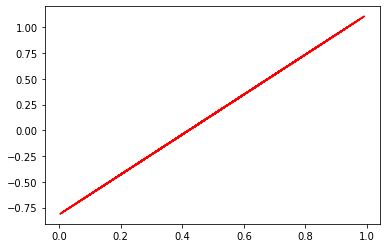

In [20]:
plt.plot(inputs, outputs, 'r')
plt.show()

### Downloading the TFLite model

In [0]:
files.download(tflite_model_file)